In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')


bank_add_full = pd.read_csv("../data/raw/bank-additional-full.csv", sep=';')

df = bank_add_full
train_df, test_df = train_test_split(df, test_size = 0.20, random_state=123)

alt.data_transformers.disable_max_rows()

numeric_features = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_features = ["job", "marital", "default", "housing", "loan", "poutcome"]
ordinal_features = ["education"]
education_ordering = ['illiterate', 'basic.4y','basic.6y','basic.9y','high.school',
            'professional.course','university.degree', 'unknown']
target = ["y"]

In [3]:
jobs = list(train_df['job'].unique())
jobs_percent_subscribed = {}
for job in jobs:
    subscribed = train_df.query("job == @job & y == 'yes'").shape[0]
    total_surveyed = train_df.query("job == @job").shape[0]
    jobs_percent_subscribed[job] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
jobs_percent_subscribed_df = pd.DataFrame.from_dict(jobs_percent_subscribed, orient='index')
jobs_percent_subscribed_df = jobs_percent_subscribed_df.reset_index().rename(columns={"index": "job", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

jobs_plot = alt.Chart(jobs_percent_subscribed_df, title="Jobs").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('job', sort='x')
)


In [4]:
def discretize(age):
    """Discretize numeric age into one of three categories."""
    if not isinstance(age, (int, float)):
        raise TypeError("Input should be a number!")
    if 17 <= age <= 35:
        return "young adults"
    elif 36 <= age <= 55:
        return "middle-aged"
    elif age > 55:
        return "older adults"
    
train_df_age_category = train_df
train_df_age_category["age_category"] = train_df_age_category["age"].apply(lambda row: discretize(row))

age_categories = list(train_df_age_category['age_category'].unique())
age_percent_subscribed = {}
for age_category in age_categories:
    subscribed = train_df_age_category.query("age_category == @age_category & y == 'yes'").shape[0]
    total_surveyed = train_df_age_category.query("age_category == @age_category").shape[0]
    age_percent_subscribed[age_category] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
age_percent_subscribed_df = pd.DataFrame.from_dict(age_percent_subscribed, orient='index')
age_percent_subscribed_df = age_percent_subscribed_df.reset_index().rename(columns={"index": "age_category", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

age_categories_plot = alt.Chart(age_percent_subscribed_df, title="Age Category").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('age_category', sort=["older adults", "middle-aged", "young adults"])
)

<ipython-input-4-b7643e962fc3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_age_category["age_category"] = train_df_age_category["age"].apply(lambda row: discretize(row))


In [5]:
poutcomes = list(train_df['poutcome'].unique())
poutcome_percent_subscribed = {}
for poutcome in poutcomes:
    subscribed = train_df.query("poutcome == @poutcome & y == 'yes'").shape[0]
    total_surveyed = train_df.query("poutcome == @poutcome").shape[0]
    poutcome_percent_subscribed[poutcome] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
poutcome_percent_subscribed_df = pd.DataFrame.from_dict(poutcome_percent_subscribed, orient='index')
poutcome_percent_subscribed_df = poutcome_percent_subscribed_df.reset_index().rename(columns={"index": "poutcome", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

poutcomes_plot = alt.Chart(poutcome_percent_subscribed_df, title="Previous outcome").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('poutcome', sort='x')
)

In [6]:
default_values = list(train_df['default'].unique())
default_percent_subscribed = {}
for default in default_values:
    subscribed = train_df.query("default == @default & y == 'yes'").shape[0]
    total_surveyed = train_df.query("default == @default").shape[0]
    default_percent_subscribed[default] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
default_percent_subscribed_df = pd.DataFrame.from_dict(default_percent_subscribed, orient='index')
default_percent_subscribed_df = default_percent_subscribed_df.reset_index().rename(columns={"index": "default", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

default_plot = alt.Chart(default_percent_subscribed_df, title="Default").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('default', sort='x')
)

In [7]:
housing_values = list(train_df['housing'].unique())
housing_percent_subscribed = {}
for housing in housing_values:
    subscribed = train_df.query("housing == @housing & y == 'yes'").shape[0]
    total_surveyed = train_df.query("housing == @housing").shape[0]
    housing_percent_subscribed[housing] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
housing_percent_subscribed_df = pd.DataFrame.from_dict(housing_percent_subscribed, orient='index')
housing_percent_subscribed_df = housing_percent_subscribed_df.reset_index().rename(columns={"index": "housing", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

housing_plot = alt.Chart(housing_percent_subscribed_df, title="Housing").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('housing', sort='x')
)

In [8]:
loan_values = list(train_df['loan'].unique())
loan_percent_subscribed = {}
for loan in loan_values:
    subscribed = train_df.query("loan == @loan & y == 'yes'").shape[0]
    total_surveyed = train_df.query("loan == @loan").shape[0]
    loan_percent_subscribed[loan] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
loan_percent_subscribed_df = pd.DataFrame.from_dict(loan_percent_subscribed, orient='index')
loan_percent_subscribed_df = loan_percent_subscribed_df.reset_index().rename(columns={"index": "loan", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

loan_plot = alt.Chart(loan_percent_subscribed_df, title="Loan").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('loan', sort='x')
)

In [9]:
marital_values = list(train_df['marital'].unique())
marital_percent_subscribed = {}
for marital in marital_values:
    subscribed = train_df.query("marital == @marital & y == 'yes'").shape[0]
    total_surveyed = train_df.query("marital == @marital").shape[0]
    marital_percent_subscribed[marital] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
marital_percent_subscribed_df = pd.DataFrame.from_dict(marital_percent_subscribed, orient='index')
marital_percent_subscribed_df = marital_percent_subscribed_df.reset_index().rename(columns={"index": "marital", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

marital_plot = alt.Chart(marital_percent_subscribed_df, title="Marital Status").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('marital', sort='x')
)

In [10]:
education_values = list(train_df['education'].unique())
education_percent_subscribed = {}
for education in education_values:
    subscribed = train_df.query("education == @education & y == 'yes'").shape[0]
    total_surveyed = train_df.query("education == @education").shape[0]
    education_percent_subscribed[education] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
education_percent_subscribed_df = pd.DataFrame.from_dict(education_percent_subscribed, orient='index')
education_percent_subscribed_df = education_percent_subscribed_df.reset_index().rename(columns={"index": "education", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

education_plot = alt.Chart(education_percent_subscribed_df, title="Education").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('education', sort=education_ordering)
)

In [11]:
contact_values = list(train_df['contact'].unique())
contact_percent_subscribed = {}
for contact in contact_values:
    subscribed = train_df.query("contact == @contact & y == 'yes'").shape[0]
    total_surveyed = train_df.query("contact == @contact").shape[0]
    contact_percent_subscribed[contact] = [total_surveyed, subscribed, round(subscribed/total_surveyed, 2)*100] 
contact_percent_subscribed_df = pd.DataFrame.from_dict(contact_percent_subscribed, orient='index')
contact_percent_subscribed_df = contact_percent_subscribed_df.reset_index().rename(columns={"index": "contact", 0: "total_surveyed", 1 : "subscribed", 2 : "percent_subscribed"})

contact_plot = alt.Chart(contact_percent_subscribed_df, title="Contact").mark_bar().encode(
    x=alt.X('percent_subscribed', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('contact')
)

In [12]:
categorical_plots = jobs_plot & age_categories_plot & poutcomes_plot & default_plot & housing_plot & loan_plot & marital_plot & education_plot & contact_plot

## Exploratory analysis on the training data set

To gain an understanding on which features could be helpful in predicting the positive class, we plotted histograms of numeric features (didn't subscibe: blue and subscibed: orange) and percent subscribed bar graphs for each of the categorical features for all observations in the training data set. Although the histograms distributions for all of the numeric features overlap to a certain degree, they do show a difference in their centres and spreads, for example, `age` histogram. For the categorical features, some features are similar in the proportion subscribed, while others seem to be promising in predicting the positive class. The `poutcome` (previous outcome) feature seem to be the best as previous success is highly associated with the positive class. In addition, the features values (`contact`: cellphone, `education`:illitrate, `age_category`:older adults then young adults, and `job`s:retired and student) seem to be associated with the positive class. 


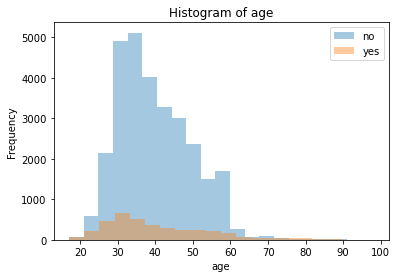

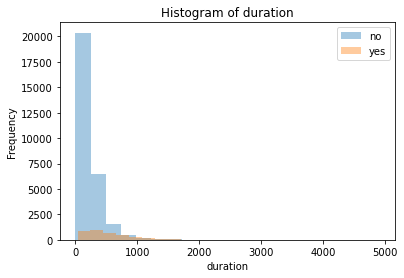

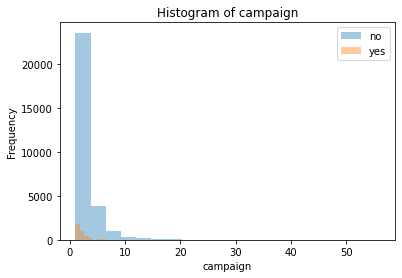

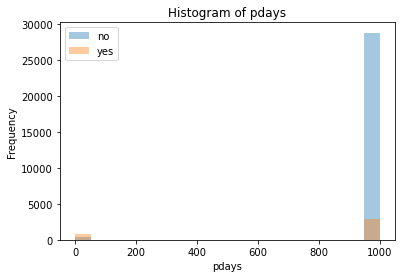

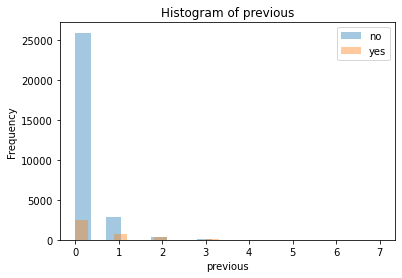

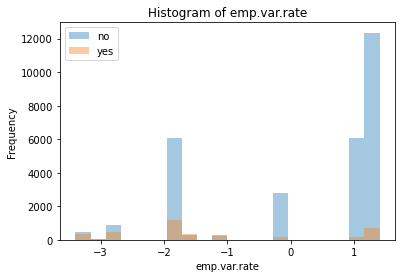

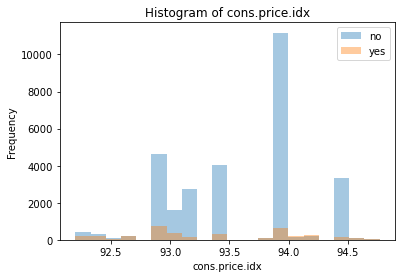

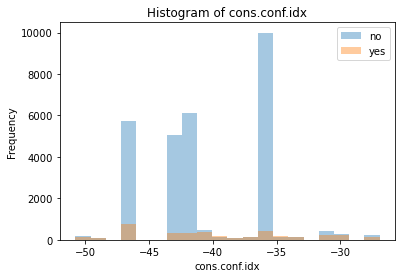

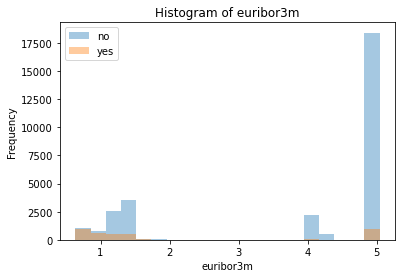

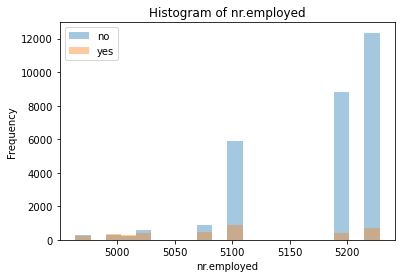

In [13]:
for feat in numeric_features:
    ax = train_df.groupby(target)[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

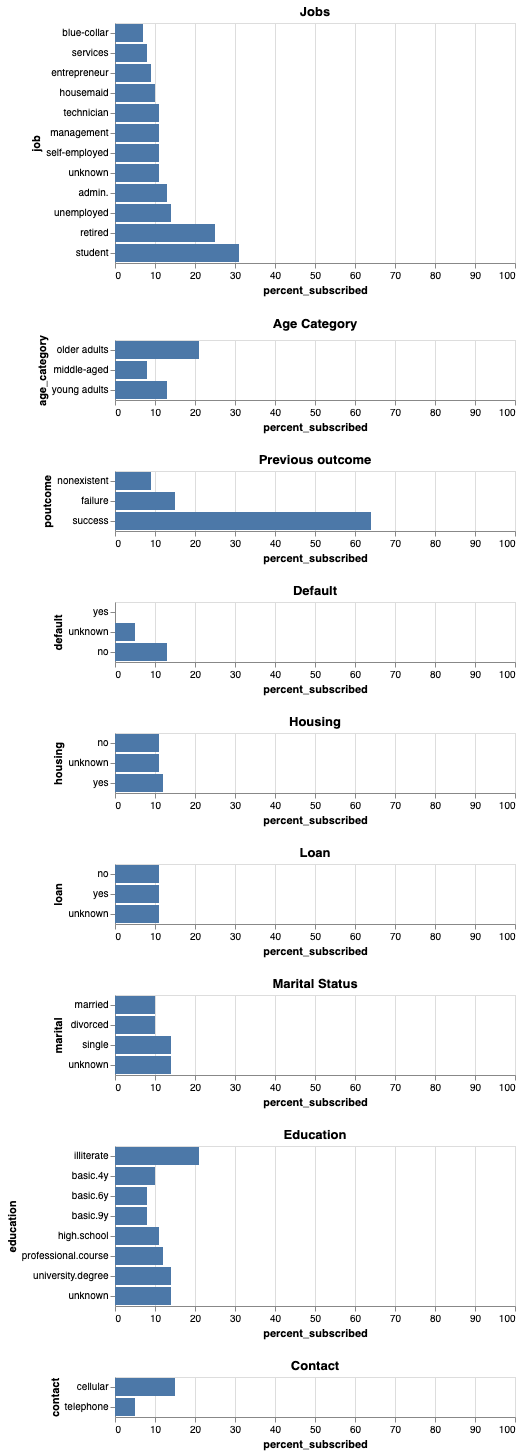

In [14]:
categorical_plots

In [48]:
#categorical_plots.save('categorical_plots.png')